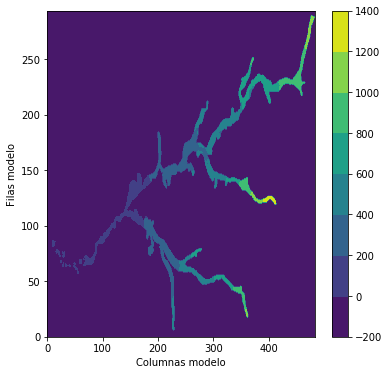

In [7]:
import flopy
import flopy.utils.binaryfile as bf
from flopy.utils.zonbud import ZoneBudget, read_zbarray
import numpy as np
import matplotlib.pyplot as plt

def main():
    
# rutas  
    ruta_zta = r'C:\Users\fcidm\Documents\WEAP Areas\Choapa_WEAP_MODFLOW_DICTUC_SEI_2019\MODFLOW_1\Choapa_corregido_transiente4 - Copy.zta'
    ruta_cbb = r'C:\Users\fcidm\Documents\WEAP Areas\Choapa_WEAP_MODFLOW_DICTUC_SEI_2019\MODFLOW_1\!MF!Choapa_corregido_transiente4_S01_1990_03.ccf'
    ruta_zone = r'C:\Users\fcidm\Documents\WEAP Areas\Choapa_WEAP_MODFLOW_DICTUC_SEI_2019\MODFLOW_1\ZoneNumbers.dat'


# leer zeta
    zfile = flopy.utils.CellBudgetFile(ruta_zta)
    kstpkper = zfile.get_kstpkper()
    zeta = []
    for kk in kstpkper:
        zeta.append(zfile.get_data(kstpkper=kk, text='ZETASRF  1')[0])
    zeta = np.array(zeta)
    
    stress_periods = len(zeta[:,:,0,0])
    
    for i in range(stress_periods):
        fig, ax = plt.subplots(figsize=(6,6))
        cf = ax.contourf(zeta[i,i,:,:])
        fig.colorbar(cf, ax=ax)

    plt.xlabel('Columnas modelo')
    plt.ylabel('Filas modelo')

    
    zon = read_zbarray(ruta_zone)
    zb = ZoneBudget(ruta_cbb, zon, kstpkper=(0, 0))
    zb.to_csv('zonebudtest.csv')
    
if __name__ == "__main__":
    main()